## The MedCare Wellness Research Center 🩺

Welcome to the MedCare Wellness Research Center, where our passion and primary objective is to enhance the quality of life across diverse communities through a deeper understanding of their health and well-being. Utilizing a robust dataset encompassing 261.311 individuals, we delve into a rich array of health indicators and lifestyle variables. Our mission is ambitious yet clear: to proactively identify health trends and potential concerns within our population. 

Join us as we embark on this data-driven exploration to forge pathways towards healthier living!

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA) 📉

At the heart of our analytical approach lies Exploratory Data Analysis (EDA), a fundamental phase that paves the way for insightful discoveries within our dataset.EDA holds a central position in the data analysis for understanding the data structure, unearthing outliers, and spotlighting patterns with the aid of intuitive plots and visualizations. Beyond mere observation, it is a rigorous process that ensures the cleanliness and integrity of our data, setting a robust stage for subsequent analysis. By engaging in thorough EDA, we mitigate the risk of errors and empower our predictive models to deliver more precise and meaningful insights. Let's see what we have discoreved!

In [2]:
# Read data
path = 'data/medcenter.csv'
medcenter_df = pd.read_csv(path)

In [3]:
# More to know about the medcare dataset

print("Relevant information of the dataset:"), (medcenter_df.info())
print("\nShape of the medcenter dataset:", medcenter_df.shape)


Relevant information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261311 entries, 0 to 261310
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Walking Difficulty        261311 non-null  object 
 1   Torsades de Pointes       261311 non-null  object 
 2   Skin Cancer               261311 non-null  object 
 3   Hours of sleep            261311 non-null  float64
 4   How do you Feel           261311 non-null  object 
 5   Asthma Status             261311 non-null  object 
 6   Do you Exercise           261311 non-null  object 
 7   Gender                    261311 non-null  object 
 8   Kidney Disease            261311 non-null  object 
 9   Is Smoking                261311 non-null  object 
 10  Ethnicity                 261311 non-null  object 
 11  Diabetes                  261311 non-null  object 
 12  How many Drinks per Week  261311 non-null  object 
 13  Age Gro

## Dataset Description 📊

Here is a more detailed description of each feature:

1. **Walking Difficulty**: Indicates if the individual experiences difficulty walking ('Y' for yes, 'N' for no).
2. **Torsades de Pointes**: Denotes a history of this specific cardiac arrhythmia ('Y' for yes, 'N' for no).
3. **Skin Cancer**: Records a diagnosis of skin cancer ('Y' for yes, 'N' for no).
4. **Hours of Sleep**: Reflects the average nightly sleep duration in hours.
5. **Self-Reported Feeling**: A subjective well-being assessment ranging from 'Poor' to 'Excellent'.
6. **Asthma Status**: Indicates if the individual has been diagnosed with asthma ('Y' for yes, 'N' for no).
7. **Exercise Frequency**: Denotes regular engagement in exercise ('Y' for yes, 'N' for no).
8. **Gender**: The gender of the individual (M for male, F for female).
9. **Kidney Disease**: Indicates kidney disease diagnosis ('Y' for yes, 'N' for no).
10. **Smoking Status**: Current smoking status ('Y' for yes, 'N' for no).
11. **Ethnicity**: Categorized by ethnic background, e.g., 'White', 'Hispanic', etc.
12. **Diabetes**: Status of diabetes, including 'N' for no, 'Y' for yes, 'No, borderline diabetes', and 'Yes (during pregnancy)'.
13. **Alcohol Consumption**: Indicates if the individual consumes alcohol ('Y' for yes, 'N' for no). The detailed quantity is not specified in this dataset.
14. **Age Group**: Categorized age range, e.g., '40-44', '60-64'.
15. **Mental Health**: A numerical indicator of mental health status.
16. **Body Mass Index (BMI)**: Calculated BMI to indicate body fat based on height and weight.
17. **Physical Health**: A numerical indicator of physical health status.
18. **History of Stroke**: Records any history of stroke ('Y' for yes, 'N' for no).
19. **Patient ID**: A unique identifier for each individual.

##### This dataset can be used to answer a variety of questions such as:

- Can we predict health risks based on a combination of reported metrics?
- What are the key predictors of overall health status in a diverse population?
- Is it possible to identify early warning signs of deteriorating health from routine health and lifestyle data?


In [4]:
# Understanding columns meanings
medcenter_df.sample(10) 

,Walking Difficulty,Torsades de Pointes,Skin Cancer,Hours of sleep,How do you Feel,Asthma Status,Do you Exercise,Gender,Kidney Disease,Is Smoking,Ethnicity,Diabetes,How many Drinks per Week,Age Group,Mental Health,Body Mass Index,Physical Health,History of Stroke,Patient ID
42046,N,N,N,7.0,Very good,Y,Y,M,N,N,White,N,N,25-29,15.0,28.29,2.0,N,493118
103896,N,N,N,8.0,Very good,N,Y,M,N,N,Hispanic,N,N,45-49,0.0,29.99,0.0,N,494893
100281,N,N,N,7.0,Very good,N,Y,M,N,Y,White,N,Y,80 or older,0.0,27.41,0.0,N,762823
46753,N,N,N,12.0,Very good,N,Y,M,N,N,Black,N,N,80 or older,0.0,24.37,0.0,N,370212
79055,N,N,N,5.0,Very good,Y,Y,F,N,Y,White,Yes (during pregnancy),N,35-39,0.0,30.18,0.0,N,246910
213575,Y,N,N,8.0,Very good,N,Y,F,N,N,White,N,N,55-59,0.0,39.16,0.0,N,395349
87808,N,N,N,8.0,Fair,Y,N,F,N,Y,White,N,N,55-59,0.0,29.95,15.0,N,272944
141118,N,N,N,7.0,Fair,Y,Y,M,N,Y,White,N,N,60-64,25.0,30.11,5.0,N,402757
142482,N,N,N,8.0,Very good,N,Y,M,N,Y,White,N,N,35-39,0.0,24.27,0.0,N,951637
142173,N,N,N,7.0,Excellent,N,Y,M,N,N,White,N,N,18-24,0.0,25.09,0.0,N,715601


The `Patient ID` is only an **identifier** which is not relevant for our analysis, it **can be removed**

In [5]:
medcenter_df.drop('Patient ID', axis = 1, inplace=True)

## In Depth-Analysis of each column 🔬

In [6]:
for column in medcenter_df.columns:
    print(f"{medcenter_df[column].nunique()} unique values in {column}: {sorted(medcenter_df[column].unique())}\n")


2 unique values in Walking Difficulty: ['N', 'Y']

2 unique values in Torsades de Pointes: ['N', 'Y']

2 unique values in Skin Cancer: ['N', 'Y']

24 unique values in Hours of sleep: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]

5 unique values in How do you Feel: ['Excellent', 'Fair', 'Good', 'Poor', 'Very good']

2 unique values in Asthma Status: ['N', 'Y']

2 unique values in Do you Exercise: ['N', 'Y']

2 unique values in Gender: ['F', 'M']

2 unique values in Kidney Disease: ['N', 'Y']



2 unique values in Is Smoking: ['N', 'Y']

6 unique values in Ethnicity: ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']

4 unique values in Diabetes: ['N', 'No, borderline diabetes', 'Y', 'Yes (during pregnancy)']

2 unique values in How many Drinks per Week: ['N', 'Y']

13 unique values in Age Group: ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

31 unique values in Mental Health: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]

3445 unique values in Body Mass Index: [12.02, 12.08, 12.13, 12.16, 12.2, 12.21, 12.4, 12.44, 12.48, 12.5, 12.53, 12.55, 12.65, 12.84, 12.85, 12.86, 12.88, 12.91, 12.92, 12.97, 13.02, 13.04, 13.08, 13.17, 13.18, 13.25, 13.29, 13.31, 13.35, 13.38, 13.4, 13.43, 13.44, 13.48, 13.53, 13.54, 13.56, 13.59, 13.6, 13.63, 13.64, 1

In [7]:
categorical_features = ['Age Group', 'How do you Feel', 'Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer', 'Asthma Status', 'Do you Exercise', 'Gender', 'Kidney Disease', 'Is Smoking', 'Ethnicity', 'Diabetes', 'How many Drinks per Week', 'History of Stroke']
numerical_features = ['Hours of sleep', 'Mental Health', 'Body Mass Index', 'Physical Health']

We see that there's a **vast majority** of categorical variables.

Our **continuous variables** are on similar scales so we don't need to impute or scale anything.

## Check data integrity 🔍

In [8]:
# check for missing values
missing_values = medcenter_df.isnull().sum() 
print('Missing values:\n',missing_values) 

Missing values:
 Walking Difficulty          0
Torsades de Pointes         0
Skin Cancer                 0
Hours of sleep              0
How do you Feel             0
Asthma Status               0
Do you Exercise             0
Gender                      0
Kidney Disease              0
Is Smoking                  0
Ethnicity                   0
Diabetes                    0
How many Drinks per Week    0
Age Group                   0
Mental Health               0
Body Mass Index             0
Physical Health             0
History of Stroke           0
dtype: int64


# Visualizing our data 📈

## Numerical Variables Univariate Analysis

In [9]:
sns.set_theme(style = 'whitegrid')

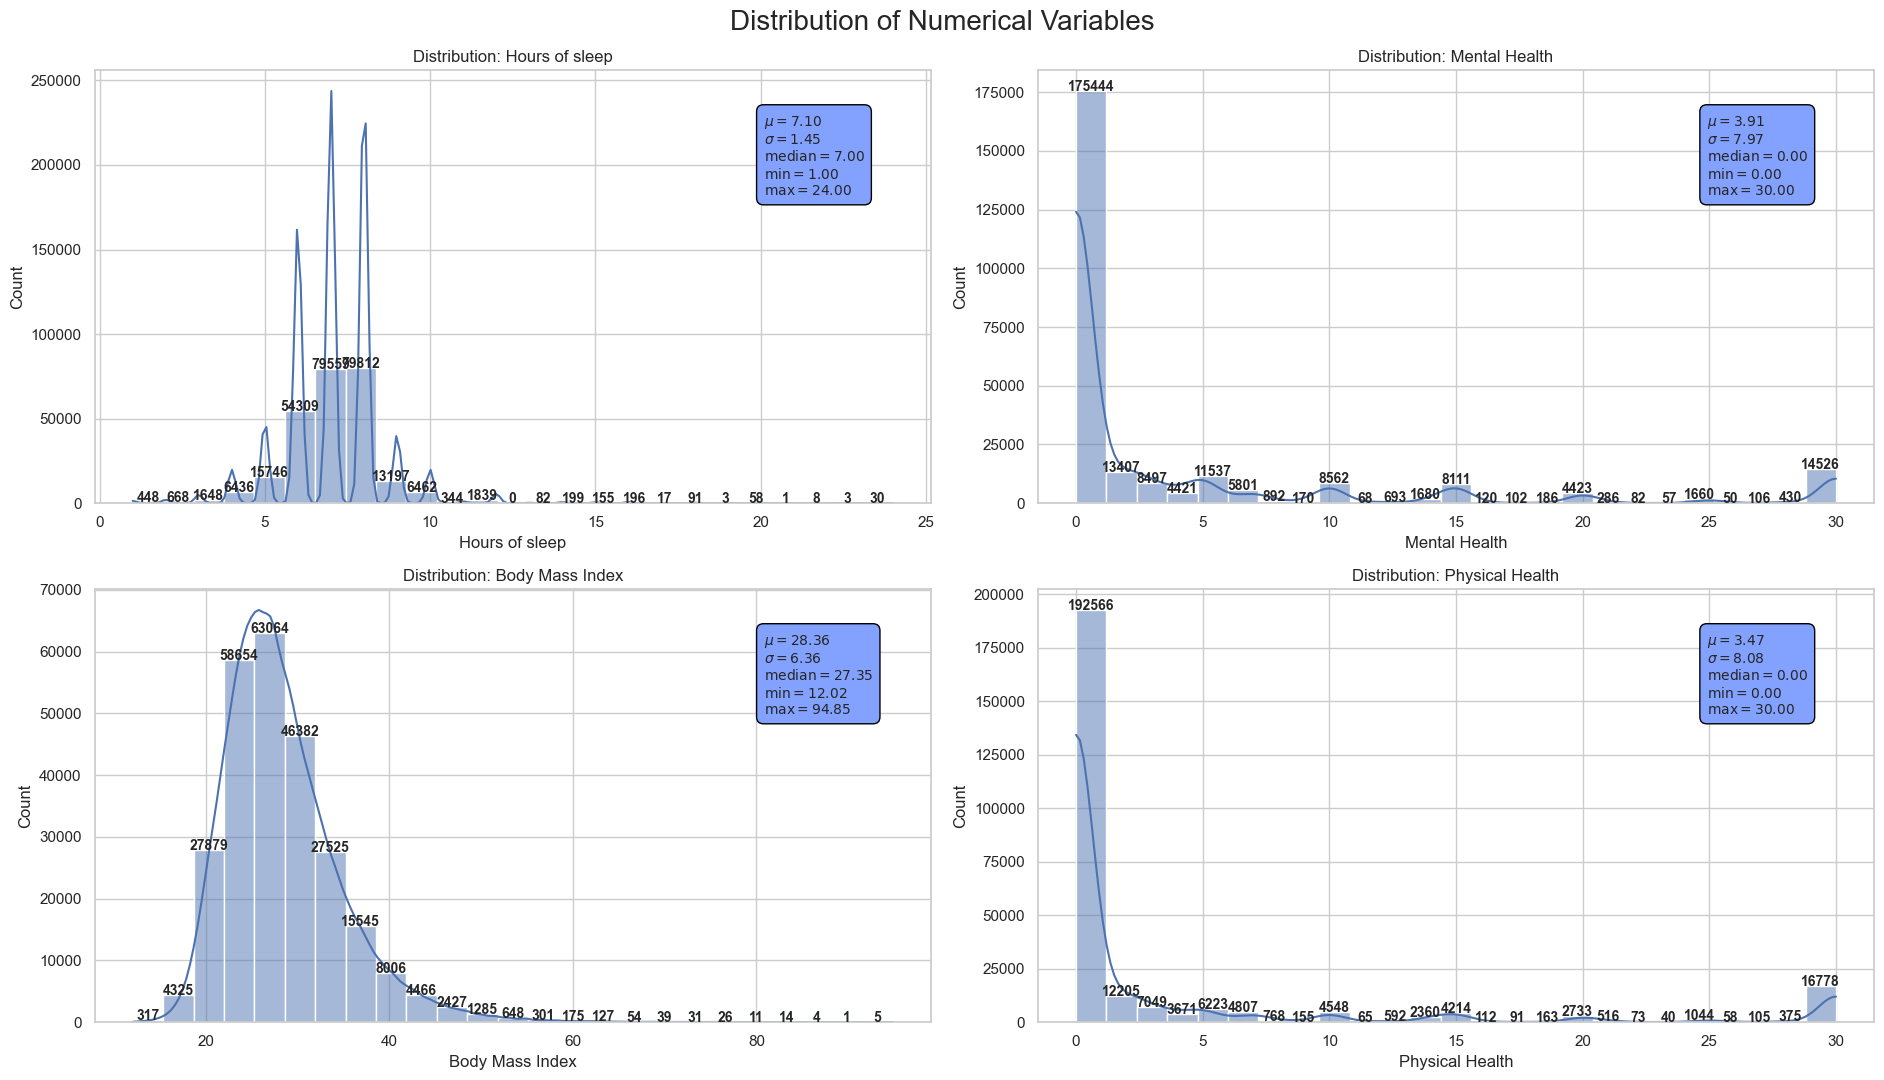

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 11))

for i in range(len(numerical_features)):
    sns.histplot(data=medcenter_df[numerical_features[i]], ax=axes[i//2, i%2], kde=True, palette='Blues', bins=25)
    title = "Distribution: " + numerical_features[i]
    axes[i//2, i%2].set_title(title)

    for j, p in enumerate(axes[i//2, i%2].patches):
        axes[i//2, i%2].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                                 ha='center', fontsize=10, fontweight="bold")
    textstr = '\n'.join((
        r'$\mu=%.2f$' % medcenter_df[numerical_features[i]].mean(),
        r'$\sigma=%.2f$' % medcenter_df[numerical_features[i]].std(),
        r'$\mathrm{median}=%.2f$' % np.median(medcenter_df[numerical_features[i]]),
        r'$\mathrm{min}=%.2f$' % medcenter_df[numerical_features[i]].min(),
        r'$\mathrm{max}=%.2f$' % medcenter_df[numerical_features[i]].max()
    ))
    
    axes[i//2, i%2].text(0.8, 0.9, textstr, transform=axes[i//2, i%2].transAxes, fontsize=10, 
                         verticalalignment='top', bbox=dict(boxstyle='round', facecolor = "#83A2FF",edgecolor='black', pad=0.5))
    
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()

### Interpretation of the results 🔍: 

1. **Distribution: Hours of Sleep**
   This histogram displays the frequency of different amounts of sleep recorded in the dataset. It shows several peaks, with the most significant peak around 7 to 8 hours, which is commonly recommended as the healthy amount of sleep for adults. There are also some smaller peaks at lower values, and a few values extend towards the higher end, suggesting some outliers in the data who report much higher sleep durations.

2. **Distribution: Mental Health**
   The histogram for mental health scores shows a steep decline in frequency as the score increases. The highest frequency is at the lower end of the scale, suggesting that a large number of individuals have lower mental health scores, with very few individuals having high scores. As we saw in the heatmap, we have a positive correlation between physical and mental health, suggesting that improvements or declines in one are often mirrored in the other. In fact, it's important to note that lower scores in both physical and mental health metrics are associated with better health outcomes.
   
3. **Distribution: Body Mass Index (BMI)**
   This histogram illustrates the BMI distribution and appears to follow a roughly normal distribution, centered around a BMI that could be within the 'healthy' range according to medical standards. The tail to the right indicates that there are fewer individuals with higher BMIs in the dataset.

4. **Distribution: Physical Health**
   Similar to the mental health histogram, the physical health distribution has a high frequency of lower scores and a rapid decline in frequency as the score increases, showing a distribution skewed to the right. This pattern suggests that lower physical health scores are more common in the dataset.



We see that most of our numerical features attain high skeweness values, indicating an asymmetry in the distribution, as we can see from the graphs above.
It can also be noticed that all values are **positive**, which indicate that the distribution is _skewed to the left_.

The only feature that is almost uniformly distributed is `Hours of Sleep`, all the others are **highly skewed** to the right, with our target variable being the one having the highest skeweness in the entire dataset.
## Considerations

Looking at our data we notice that there are some really weird values in both `Hours of sleep` and `Body Mass Index`:
- For `Hours of sleep` we see that it has a maximum value of 24 and a minimum value of 1. Both values does not make sense, how is the patient sleeping all day and how is he surviving sleeping only 1 hour?
- For `Body Mass Index` we see that we have a maximum value of 94.85; by knowing that a person is considered _severely obese_ with a BMI > 40, having a BMI of 94.85 is just impossible. Also the minimum value for this feature (12.02) is suspicious, knowing that below 18.5 is very underweight for a normal person.

Common sense suggests us that we should set a threshold to determine which of those values are feasible.

The histograms provided also illustrate that the distributions for both `Physical Health` and `Mental Health` variables are highly skewed, with a significant concentration of values at the lower end of the scale. This skewness suggests that the data does not follow a normal distribution, which could be indicative of non-random underlying processes or the presence of many filling or default values. Such a pattern often occurs when zero values are recorded in place of missing or unreported data. We will delve into this peculiarity later to understand the nature of these potential filler values and assess their impact on our data analysis.

## Heatmap of Numerical Features

<Axes: >

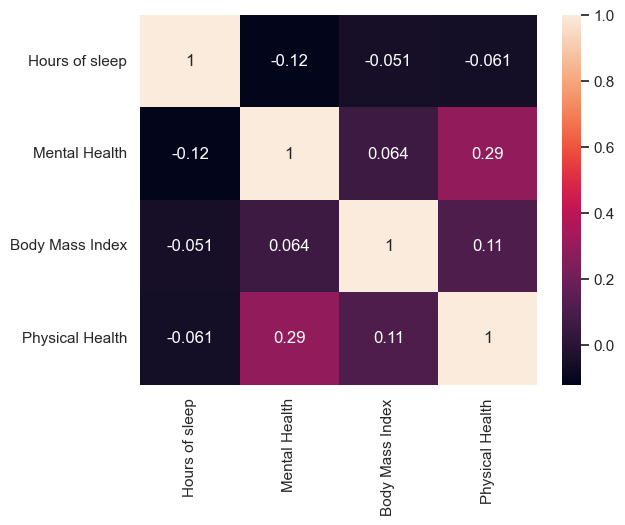

In [11]:
sns.heatmap(data = medcenter_df[numerical_features].corr(numeric_only=True), annot=True, cmap='rocket')

1. **Hours of Sleep**:

- It has a small negative correlation with Mental Health (-0.119688), indicating a slight tendency for people with fewer hours of sleep to have slightly worse mental health.
- It has a small negative correlation with Body Mass Index (-0.051189), suggesting a slight tendency for people with fewer hours of sleep to have a slightly higher BMI.
- It has a small negative correlation with Physical Health (-0.061287), implying a slight tendency for people with fewer hours of sleep to have slightly worse physical health.

2. **Mental Health**:
- It has a small negative correlation with Hours of Sleep (-0.119688), indicating a slight tendency for people with worse mental health to have fewer hours of sleep.
- It has a moderate positive correlation with Physical Health (0.289395), suggesting that better mental health is associated with better physical health.

3. **Body Mass Index**:
- It has a small positive correlation with Mental Health (0.063734), indicating a slight tendency for people with a higher BMI to have slightly better mental health.
- It has a small positive correlation with Physical Health (0.110544), suggesting that a higher BMI is associated with better physical health.

4. **Physical Health**:
- It has a small positive correlation with both Mental Health (0.289395) and Body Mass Index (0.110544), indicating that better physical health is associated with better mental health and a higher BMI to some extent.






## Bivariate Analysis 🔗
## Comparing Categorical Variables with the Target Variable using Boxplots

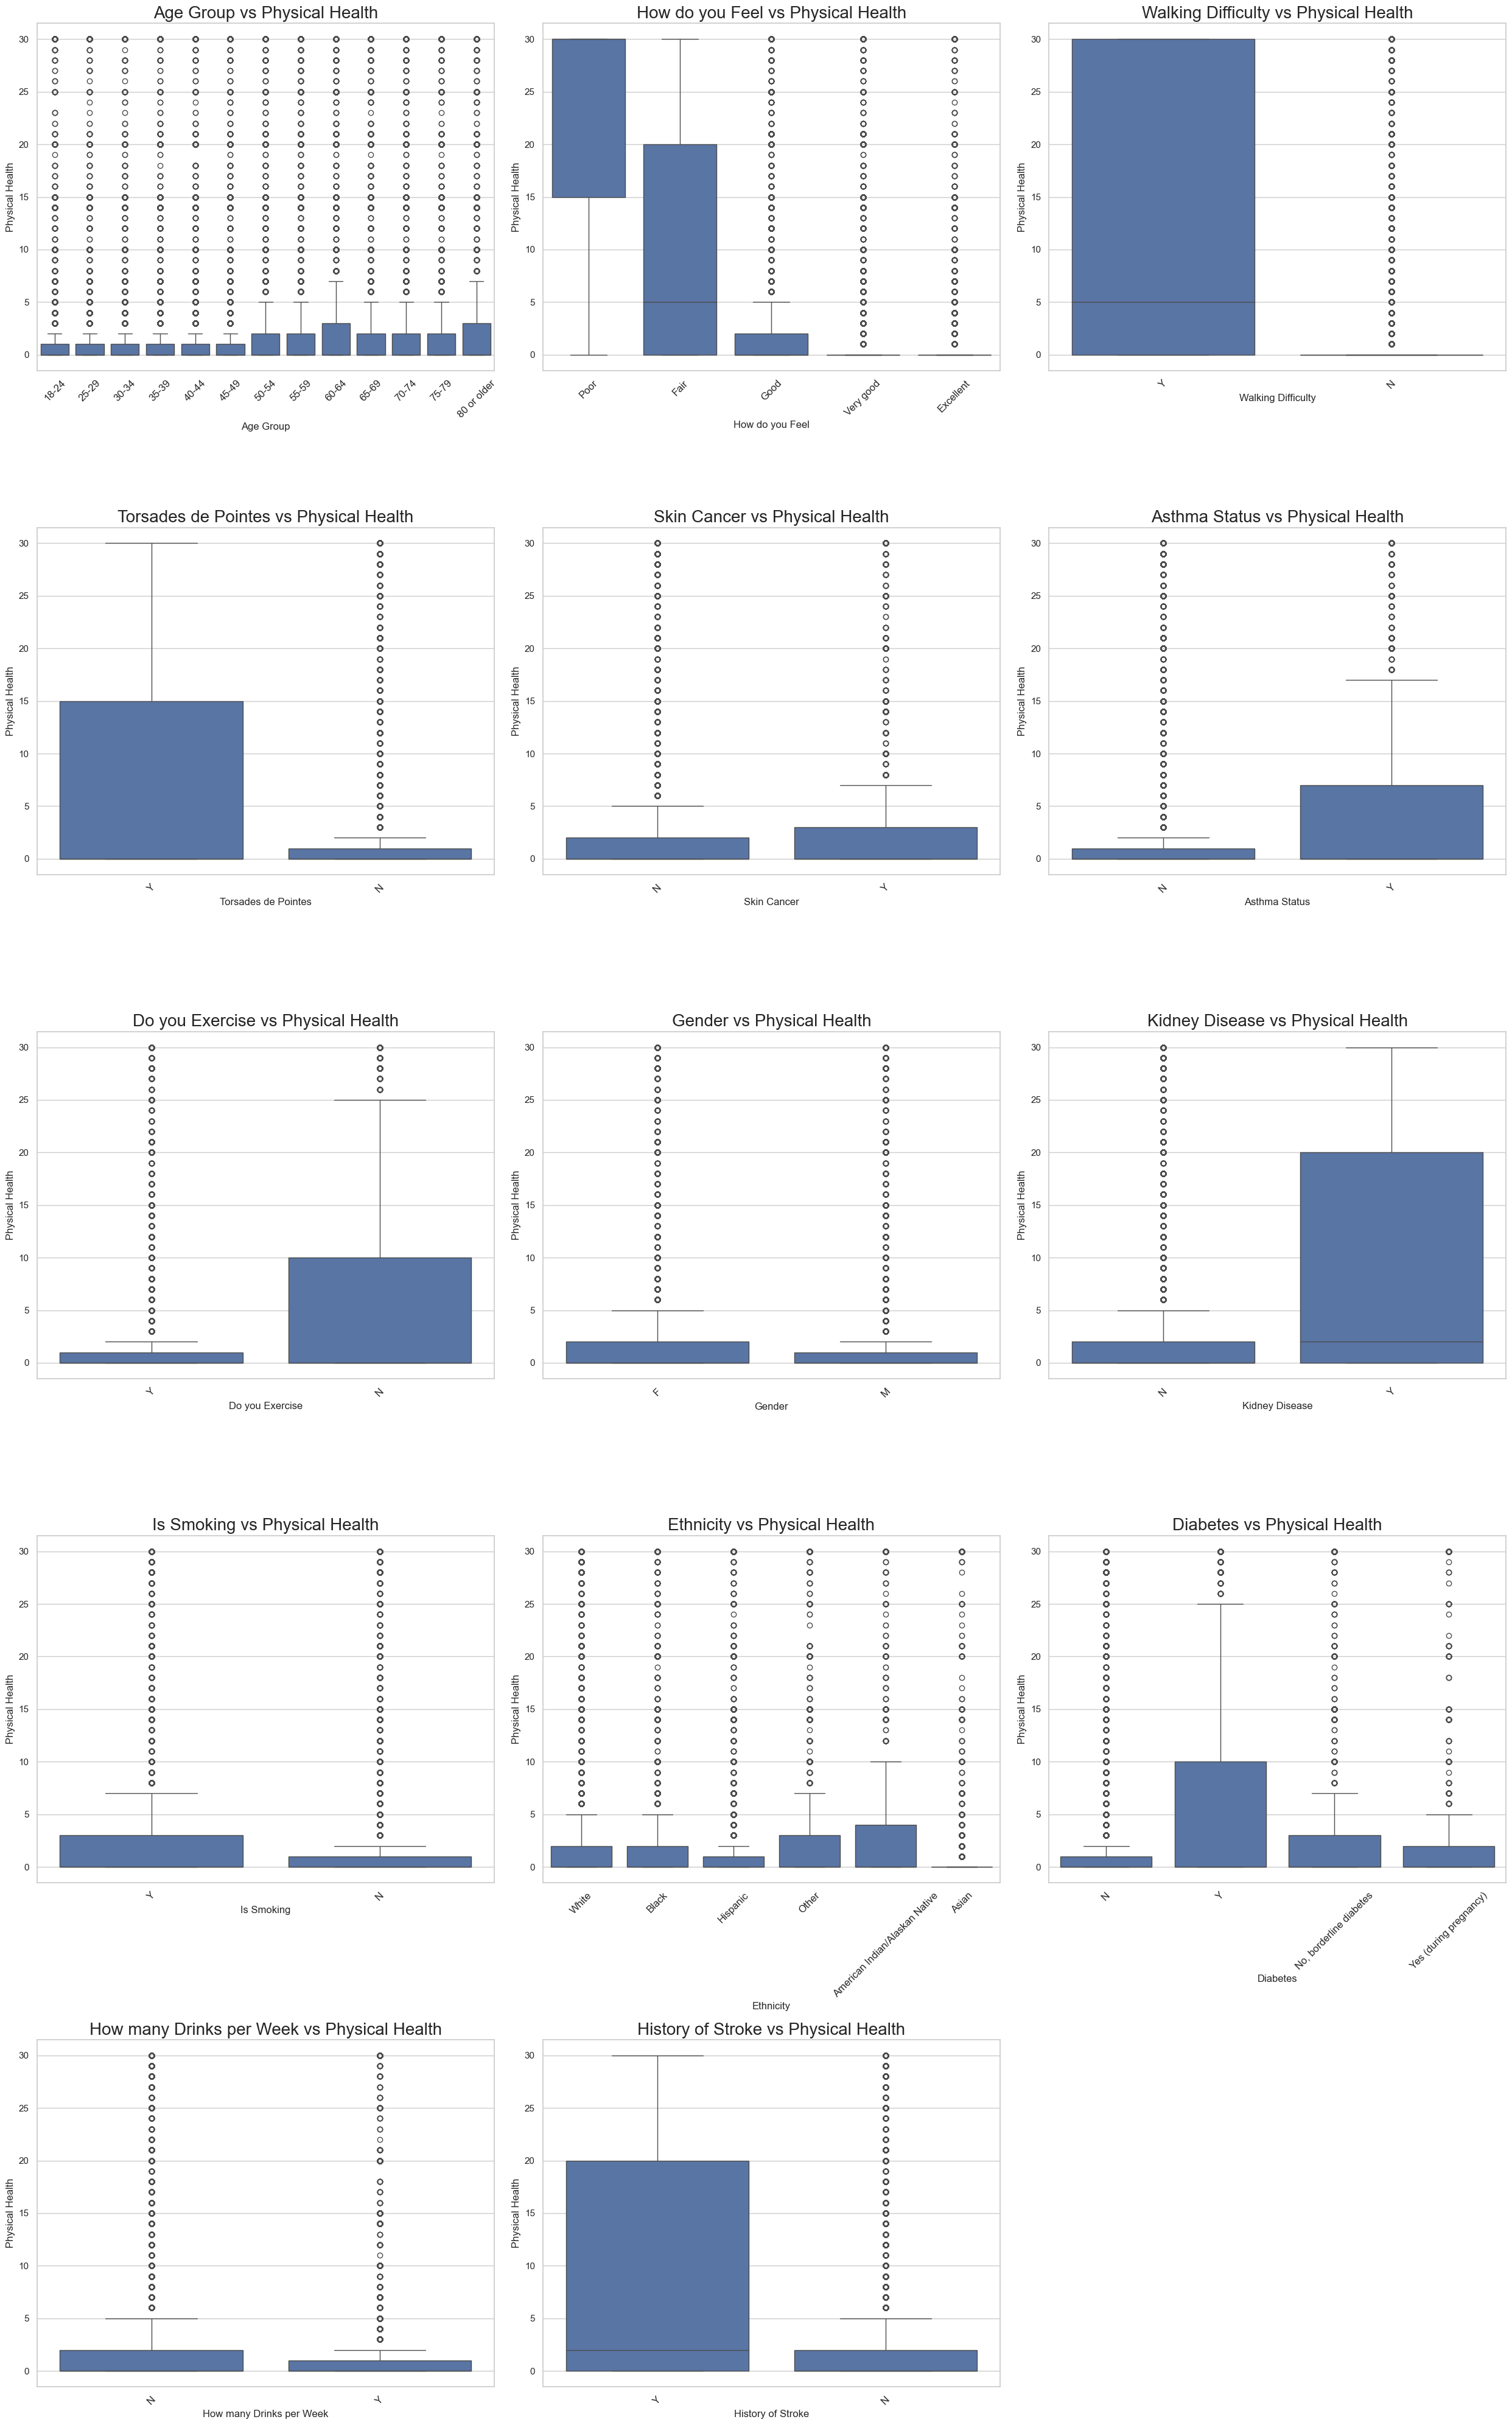

In [12]:
fig, axes = plt.subplots(5,3, figsize = (25,40))

for i in range(len(categorical_features)):
    if categorical_features[i] == 'Age Group':
        sns.boxplot(data = medcenter_df, y = 'Physical Health', x = categorical_features[i], ax = axes[i//3, i%3], order = sorted(medcenter_df['Age Group'].unique()))
    elif categorical_features[i] == 'How do you Feel':
        sns.boxplot(data = medcenter_df, y = 'Physical Health', x = categorical_features[i], ax = axes[i//3, i%3], order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
    else:
        sns.boxplot(data = medcenter_df, y = 'Physical Health', x = categorical_features[i], ax = axes[i//3, i%3])
        
    axes[i//3, i%3].set_title(f"{categorical_features[i]} vs Physical Health", fontsize = 20)
    axes[i//3, i%3].tick_params(axis='x', labelrotation=45, labelsize = 12)

plt.delaxes(ax = axes[4,2])
plt.tight_layout()

### Interpretation of the results 🔍: 

1. **Age group vs Physical Health**: 

    this graph does not provide any meaningful insight about some correlation between age and physical health. We see that most of the physical health scores are very low, independently from the group age, but we also have tons of outliers without a clear trend.

2. **How do you feel vs Physical Health**: 

    this graph is interesting because it appears that patients feelings are exactly the opposite of their health score. We initially assumed that a high health score meant that the patient was healthy, but from this graph we started questioning this assumption: we see that patients feeling _poor_ have a physical health score above 15, those feeling _fair_ have physical health below 20, and then those feeling _good_, _very good_ and _excellent_ have a physical health score around zero. Note that those last three categories have a huge amount of outliers and how a patient feels is not entirely reliable to assess if their health conditions are good or not. We need to investigate more to see if this feature is not relevant to our analysis, and possibly exclude it because it gives misleading indications to predict our target variable, or we might have to reconsider the meaning of the score `Physical Health` (with a high vaue indicating that the patient is ill and a low value meaning that the patient is healthy).

3. **Walking Difficulty vs Physical Health**:

    we note that those who **don't** have walking difficulty have in average a much lower physical health score, while those who do have walking difficulty span almost all the possible values of physical health, without a clear trend.

4. **Torsades de Pointes vs Physical Health**: 

    also here, in average, those who have torsades the pointes have a higher physical health score than those who aren't affected by this illness.

5. **Skin Cancer vs Physical Health**: 

    this graph is pretty balanced between those who aren't affected by skin cancer and those who do, suggesting that this feature may not be as impactful as the others with respect to our target variable. However also in this case, even if the difference is more subtle, the average physical health score of those who don't have skin cancer is lower than those who have it.

6. **Asthma Status vs Physical Health**: 

    This box plot compares physical health scores between individuals with and without asthma. Individuals without asthma ('N') have a narrow range of low physical health scores with several outliers indicating higher scores. In contrast, those with asthma ('Y') show a wider range of physical health scores, as evidenced by the taller box, and include both lower and higher scores, with the median notably higher than that of the non-asthma group. The presence of outliers in both groups suggests that there are exceptions to the general trend within each category.

7. **Do You Exercise vs Physical Health**:

    The box plot shows physical health scores against exercise habits. Those who don't exercise ('N') have tightly grouped, high physical health scores, suggesting they generally report poorer health. The exercising group ('Y') has a wider spread of scores with a lower median, indicating better self-reported health on average. However, there are several high-scoring outliers in the 'Y' group, which are exceptions, showing that some people who exercise still report poor health. 

8. **Gender vs Physical Health**:

    In this visualization, we see physical health scores laid out by gender. The female group ('F') displays a broader range of physical health scores with a higher median compared to the male group ('M'), indicating that females are reporting worse physical health on average. However, there are outliers in both groups—people far above the median—which means there are both males and females who report poor physical health. These outliers in both gender groups suggest that there are individual variations in reported physical health that go beyond gender differences.

9. **Kidney Disease vs Physical Health**: 

    This box plot contrasts the physical health scores between individuals with and without kidney disease. Those without the disease ('N') generally report lower physical health scores, indicating better health, with a few high-score outliers representing worse health reports. On the other side, individuals with kidney disease ('Y') have a significantly higher median score, suggesting a trend toward poorer health. The spread of scores in this group is also much larger, pointing to a varied experience of health among those with kidney disease. The compact box for those without kidney disease suggests less variability in health perception compared to the wide box for those with the disease, which shows a diverse range of health states.

10. **Is Smoking vs Physical Health**:
    The box plot reveals a small but difference in self-reported physical health between smokers and non-smokers. The medians are close, suggesting that smoking status alone does not dramatically differentiate physical health outcomes in this sample. The distribution and outliers indicate variability within both groups, emphasizing that factors other than smoking may influence individuals' physical health reports.

11. **Ethnicity vs Physical Health**:
    The box plot compares physical health scores across different ethnic groups. The median scores are fairly similar for 'White', 'Black', and 'Hispanic', suggesting minor differences in reported physical health across these groups. The 'Other' and 'Asian' categories show a slightly higher median, which could indicate a perception of poorer health, while the 'Non-Native' group has a wider range of scores. All groups have outliers with high scores, indicating individuals reporting poor health regardless of ethnicity. The data implies that ethnicity, in this sample, has a relatively small impact on physical health scores.

12. **Diabetes vs Physical Health**:
    The graph subtly indicates that diabetes may influence physical health, but the modest variation in medians suggests its impact is not pronounced in this dataset. The overlap and presence of outliers in all groups hint at a complex interplay of factors affecting physical health beyond diabetes alone.

13. **How Many Drinks per Week vs Physical Health**:
    The graph indicates a slight difference in physical health scores between those who don't drink and those who do. Both groups have outliers showing some individuals reporting poor health, but the overall scores are quite close, suggesting that the number of drinks consumed per week is not a strong indicator of physical health in this dataset.

14. **History of Stroke vs Physical Health**:
    The graph presents physical health scores, showing a notably wider range of values for individuals with a history of stroke ('Y') compared to those without ('N'). The 'N' group has outliers on the higher end, which are the individual points displayed beyond the top whisker. Moreover, the 'N' group's median score is not visible, suggesting it may be very low, while the 'Y' group's median is around 3, indicating a higher central tendency of physical health scores in this group.

## Other important Distributions 📉

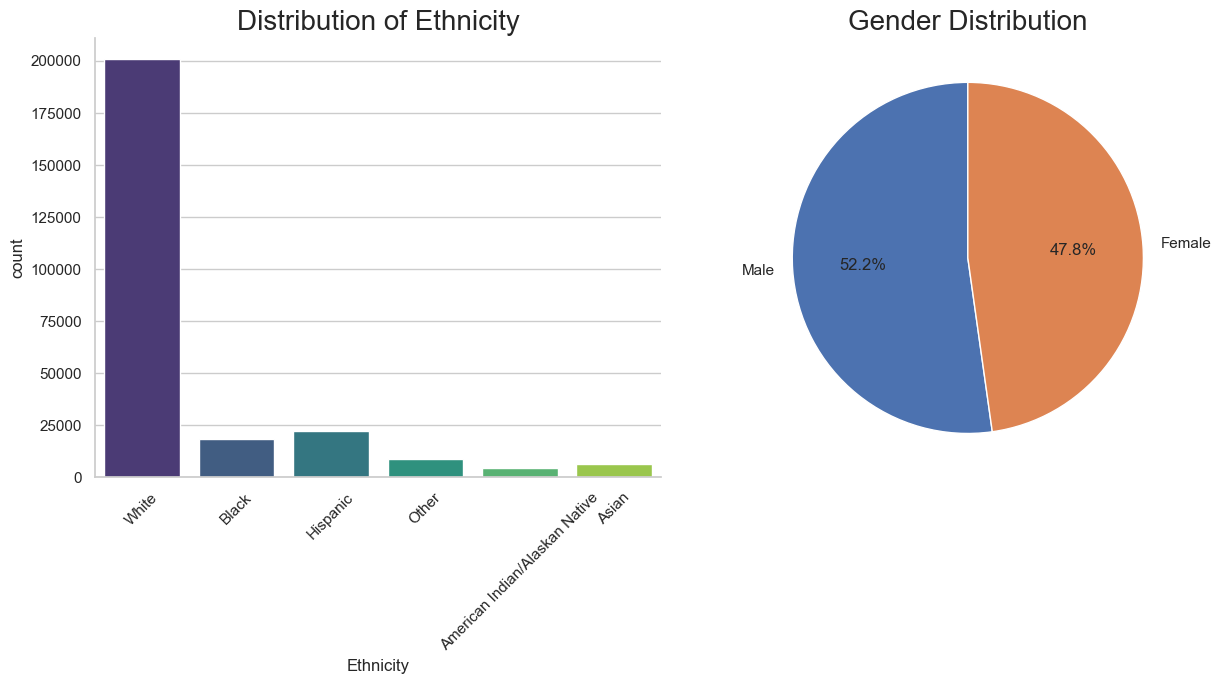

In [13]:
fig, axes = plt.subplots(1,2, figsize = (13,7))

sns.countplot(data = medcenter_df, x = 'Ethnicity', palette = 'viridis', ax = axes[0])
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].set_title("Distribution of Ethnicity", fontsize = 20)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

plt.title("Gender Distribution", fontsize = 20)
plt.pie(medcenter_df['Gender'].value_counts(), autopct='%1.1f%%', labels=['Male', 'Female'], startangle = 90)
plt.tight_layout()


### Interpretation of the results 🔍: 

**Distribution of Ethnicity (Bar Chart):**
- The bar chart shows the counts of individuals from different ethnic groups within a dataset.
- The "White" category has the highest count, significantly more than other groups, suggesting a dataset predominantly composed of individuals identified as White.
- The other ethnic groups (Black, Hispanic, Other, American Indian/Alaskan Native, Asian) have much lower counts, indicating underrepresentation compared to the White category.
- Such a distribution might affect the fairness and performance of AI systems trained on this dataset, as they may become less accurate for underrepresented groups.

**Gender Distribution (Pie Chart):**
- The pie chart illustrates the percentage of males and females in the dataset.
- Males make up 52.2% of the dataset, and females 47.8%.
- This distribution is relatively balanced, but depending on the AI application, even a slight imbalance could result in gender bias.

**AI Ethics Implications:**
- **Bias**: If an AI system is trained on these data, it may perform better for the majority group (White and Male) due to more extensive data availability, resulting in biased performance against other groups.
- **Representation**: The underrepresentation of certain ethnic groups can lead to AI systems that are less effective or fair for those groups.
- **Fairness**: It's important for AI to be fair and equitable, which requires diverse and balanced datasets to ensure the AI doesn't inherit or perpetuate existing biases.
- **Performance**: AI performance may not be uniform across different demographics if the training data is not representative of the population the AI will serve.


## Investigating the Skeweness of our numerical Features

We are going to compute the **skweness** for each column of the numerical data present in our dataset.

- If the skeweness is between -0.5 and 0.5 the data are **fairly simmetrical**
- If the skeweness is between -1 and -0.5 or between 0.5 and 1, the data are **moderately skewed**
- If the skeweness is less than -1 or greater than 1, the data are **highly skewed**

In [14]:
medcenter_df[numerical_features].skew().sort_values(ascending = False)

Physical Health    2.544864
Mental Health      2.326971
Body Mass Index    1.324690
Hours of sleep     0.729144
dtype: float64

We see that most of our numerical features attain high skeweness values, indicating an asymmetry in the distribution, as we can see from the graphs above.
It can also be noticed that all values are **positive**, which indicate that the distribution is _skewed to the left_.

The only feature that is almost uniformly distributed is `Hours of Sleep`, all the others are **highly skewed** to the right, with our target variable being the one having the highest skeweness in the entire dataset.
## Considerations ✍️

We can't say much about `Physical Health` and `Mental Health` yet, but by looking at our data we notice that there are some really weird values in both `Hours of sleep` and `Body Mass Index`:
- For `Hours of sleep` we see that it has a maximum value of 24 and a minimum value of 1. Both values does not make sense, how is the patient sleeping all day and how is he surviving sleeping only 1 hour?
- For `Body Mass Index` we see that we have a maximum value of 94.85; by knowing that a person is considered _severely obese_ with a BMI > 40, having a BMI of 94.85 is just impossible. Also the minimum value for this feature (12.02) is suspicious, knowing that below 18.5 is very underweight for a normal person.

Common sense suggests us that we should set a threshold to determine which of those values are feasible.

## Handling Skewed Distributions

We'll experiment a mathematical transformation on our skewed data to see if we can manage to adjust the distributions to a more or less normal distribution. We do it because some algorithms, like linear regression models benefit from a normal distribution.

Since our data is **Right Skewed** we use the _Log Transform_.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

def logTransform(data, feature):
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(data[feature], kde=True, color="red")
    plt.subplot(1,2,2)

    df_log = pd.DataFrame(logTr.fit_transform(data))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

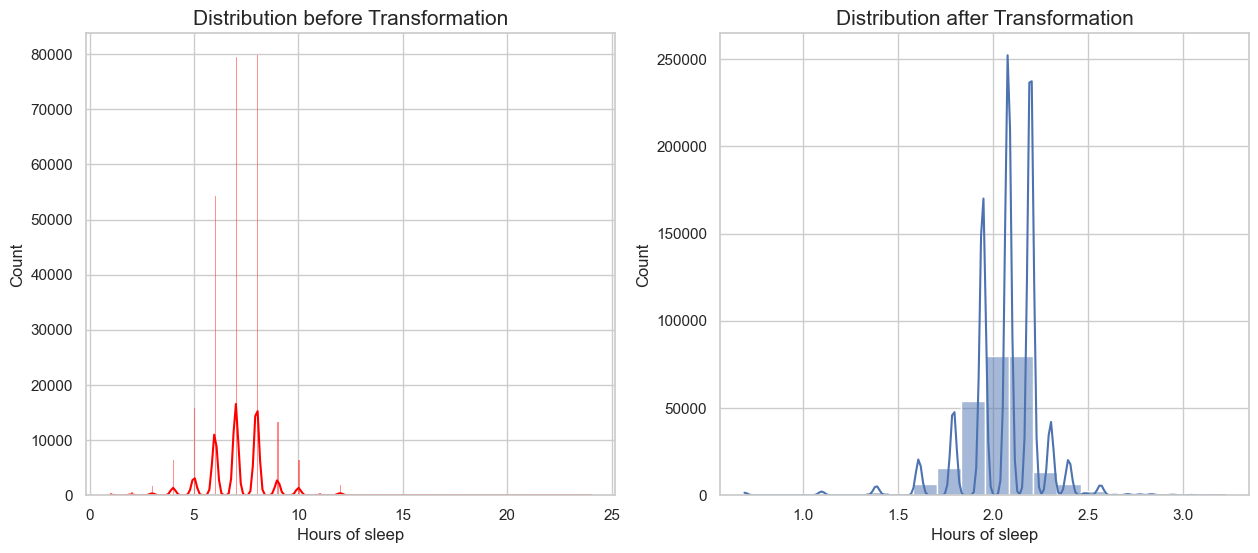

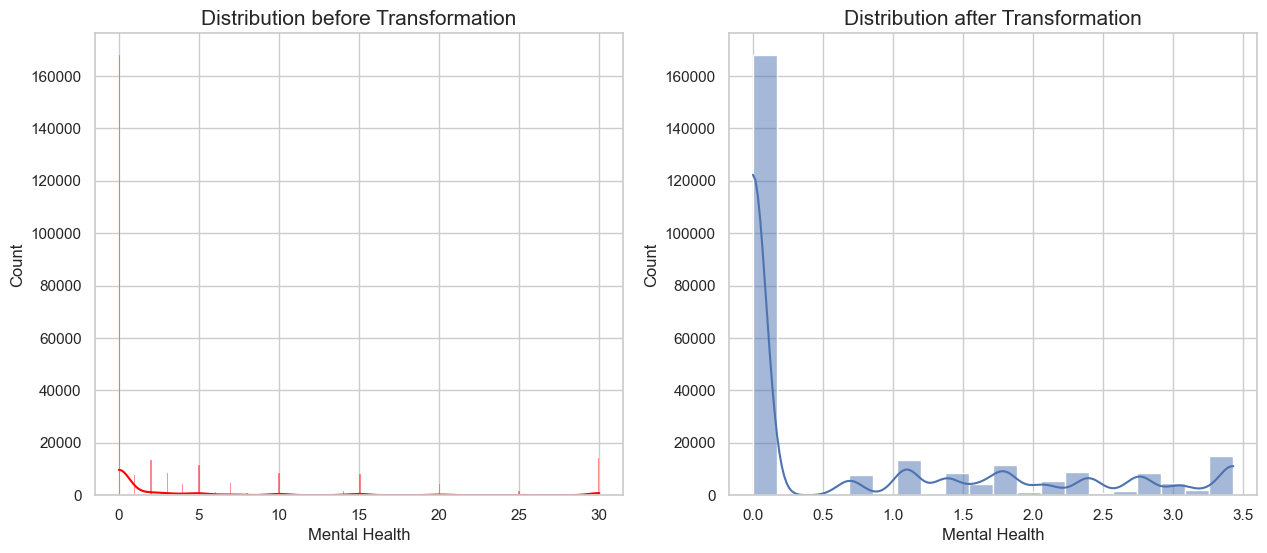

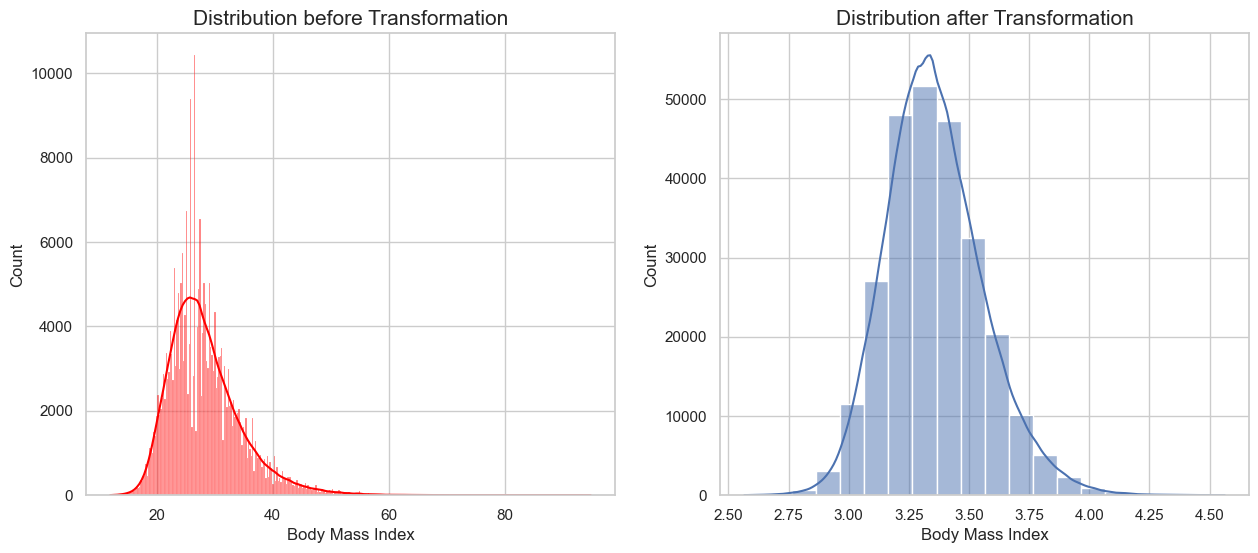

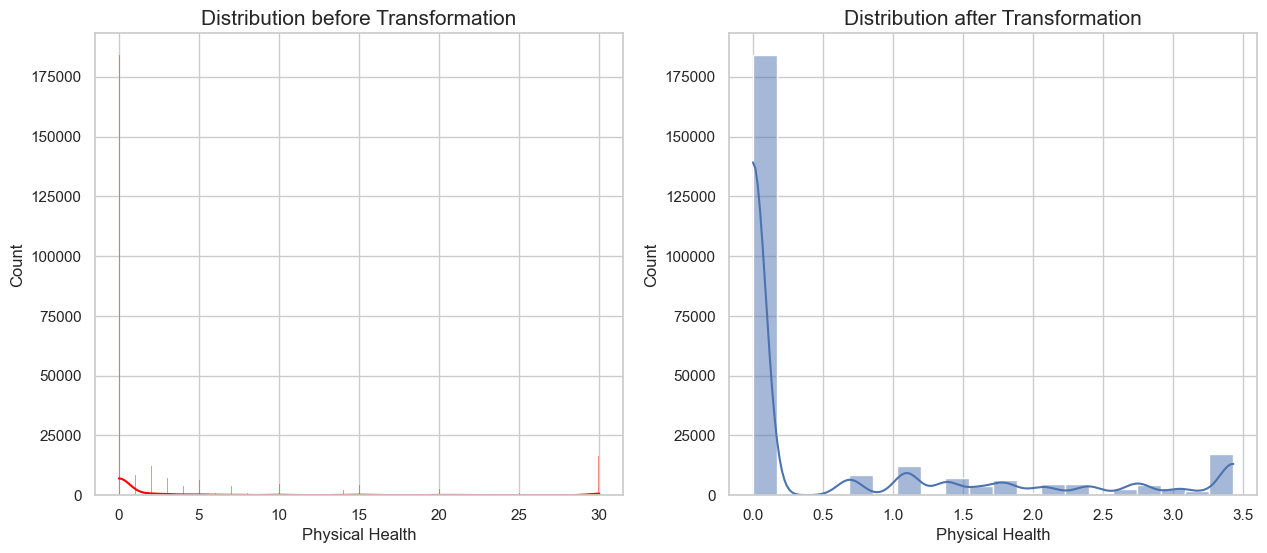

In [16]:
for feature in numerical_features:
    logTransform(medcenter_df, feature)

# Data Preprocessing ⚙️

## Some considerations on the preprocessing

- There are **no missing values**
- There is a **vast majority of categorical features**
- There are only 4 numerical features: [`Hours of sleep`, `Mental Health`, `Body Mass Index`, `Physical Health`]


## Handling Outliers 🔬

Outlier removal is a key step in data preprocessing, ensuring accuracy and reliability in statistical analyses and predictive modeling. It helps in mitigating the skewing effect of extreme values on key metrics like mean and standard deviation. By eliminating or adjusting outliers, we can reach more robust and valid conclusions.

An important measure of shape we can compute is the **Kurtosis**. It measures wether our dataset is heavy-tailed or light-tailed compared to a normal distribution.

- High kurtosis means that our distribution is **heavy-tailed** with **lots of outliers**
- Low kurtosis means that our distribution is **light-tailed** with **few outliers**

In [17]:
medcenter_df[numerical_features].kurt().sort_values(ascending = False)

Hours of sleep     8.276485
Physical Health    5.190173
Mental Health      4.379137
Body Mass Index    3.816084
dtype: float64

As we expected, our features (except maybe the BMI) all have high values. The specific term is **Leptokurtic**, a type of distribution having kurtosis > 3. A consequence of having lots of outliers is the _skinniness_ of the graph: the horizontal axis gets stretched, making the bulk of the data appear in a narrow vertical range.

We can infer that `Hours of sleep` is a feature presenting a really high number of outliers.


In [18]:
sleep_hrs_outliers = medcenter_df.loc[(medcenter_df['Hours of sleep'] > 14) | (medcenter_df['Hours of sleep'] < 2)].shape[0]
bmi_outliers = medcenter_df.loc[(medcenter_df['Body Mass Index'] > 50) | (medcenter_df['Body Mass Index'] < 12)].shape[0]


potential_outliers_to_remove = sleep_hrs_outliers + bmi_outliers

print(f"Potential outliers to remove are {potential_outliers_to_remove} on {medcenter_df.shape[0]} total data")

Potential outliers to remove are 3083 on 261311 total data


We decided to proceed like this because in examining the boxplots of the 'Hours of sleep' we observe outliers that suggest some individuals are sleeping for example 24 hours a day, which is biologically implausible for a regular sleep pattern and may indicate data entry errors or extreme cases that need to be validated. Similarly, the 'BMI' boxplot shows outliers with extremely high values or extremely low values that may be due to incorrect data entry or rare medical conditions. Given these unusual values, we should consider removing these outliers to ensure the integrity of any analysis conducted on this dataset.

In [19]:
# outliers with quartiles ?
# Outliers can skew statistical analyses and model predictions, leading to less accurate results. They often represent anomalies that are not typical of the data set 
# and can be caused by measurement or entry errors. The quartile-based method for removing outliers is widely used because it is robust and non-parametric, making no 
# underlying assumptions about the distribution of the data, thus providing a clear, statistical rule for identifying which points are likely to be outliers.
# By applying this method to our dataset, we reduced it from 261.312 rows to 188.176 rows, eliminating data points that could potentially bias our analysis.

### Encoding Categorical Variables 🔂
Label encoding and one-hot encoding are techniques used to convert categorical data into numerical form, facilitating its use in machine learning algorithms. Label encoding assigns each unique category a numerical value, maintaining the order but potentially implying a numerical relationship where none exists. One-hot encoding, in contrast, creates separate binary columns for each category, eliminating ordinal implications but increasing the dimensionality of the dataset.

In our model, we have chosen to apply **Label Encoder** to the variables `How do you Feel`, `Age Group`, and `Diabetes` due to the inherent ordinal nature of their values, where a hierarchical structure can be discerned. For the variable `Gender`, we treat it as a binary variable. Additionally, we employ **One-hot encoding** for all binary variables, including 'Gender', translating 'Y' and 'N' to 1 and 0, respectively. This approach ensures a more accurate representation of these categorical variables for our model.
Ethnicity ? get dummies ? 

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Columns to be one-hot encoded
onehot_encoded_columns = ['Gender', 'Ethnicity', 'Walking Difficulty', 'Skin Cancer', 'Torsades de Pointes', 'Asthma Status', 'Do you Exercise', 'Kidney Disease','Is Smoking','History of Stroke', 'How many Drinks per Week']
# Columns to be label encoded
label_encoded_columns = ["How do you Feel", "Age Group", "Diabetes"]

# Applying OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # 'drop' parameter is used to avoid multicollinearity
for column in onehot_encoded_columns:
    # The encoder returns a 2D array, which we need to convert to a DataFrame
    onehot_df = pd.DataFrame(encoder.fit_transform(medcenter_df[[column]]))
    
    # The new columns will be named after the classes detected by the encoder
    onehot_df.columns = encoder.get_feature_names_out([column])
    
    # Drop the original column from the main DataFrame
    medcenter_df.drop([column], axis=1, inplace=True)
    
    # Concatenate the one-hot encoded DataFrame to the main one
    medcenter_df = pd.concat([medcenter_df, onehot_df], axis=1)

# Applying LabelEncoder
le = LabelEncoder()
for column in label_encoded_columns:
    medcenter_df[column] = le.fit_transform(medcenter_df[column])

medcenter_df.head()


,Hours of sleep,How do you Feel,Diabetes,Age Group,Mental Health,Body Mass Index,Physical Health,Gender_M,Ethnicity_Asian,Ethnicity_Black,...,Ethnicity_White,Walking Difficulty_Y,Skin Cancer_Y,Torsades de Pointes_Y,Asthma Status_Y,Do you Exercise_Y,Kidney Disease_Y,Is Smoking_Y,History of Stroke_Y,How many Drinks per Week_Y
0,10.0,2,0,12,0.0,15.55,7.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,7.0,1,2,9,0.0,38.62,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.0,2,0,8,0.0,21.62,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,2,0,9,0.0,22.14,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8.0,1,2,10,0.0,43.05,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


<Axes: >

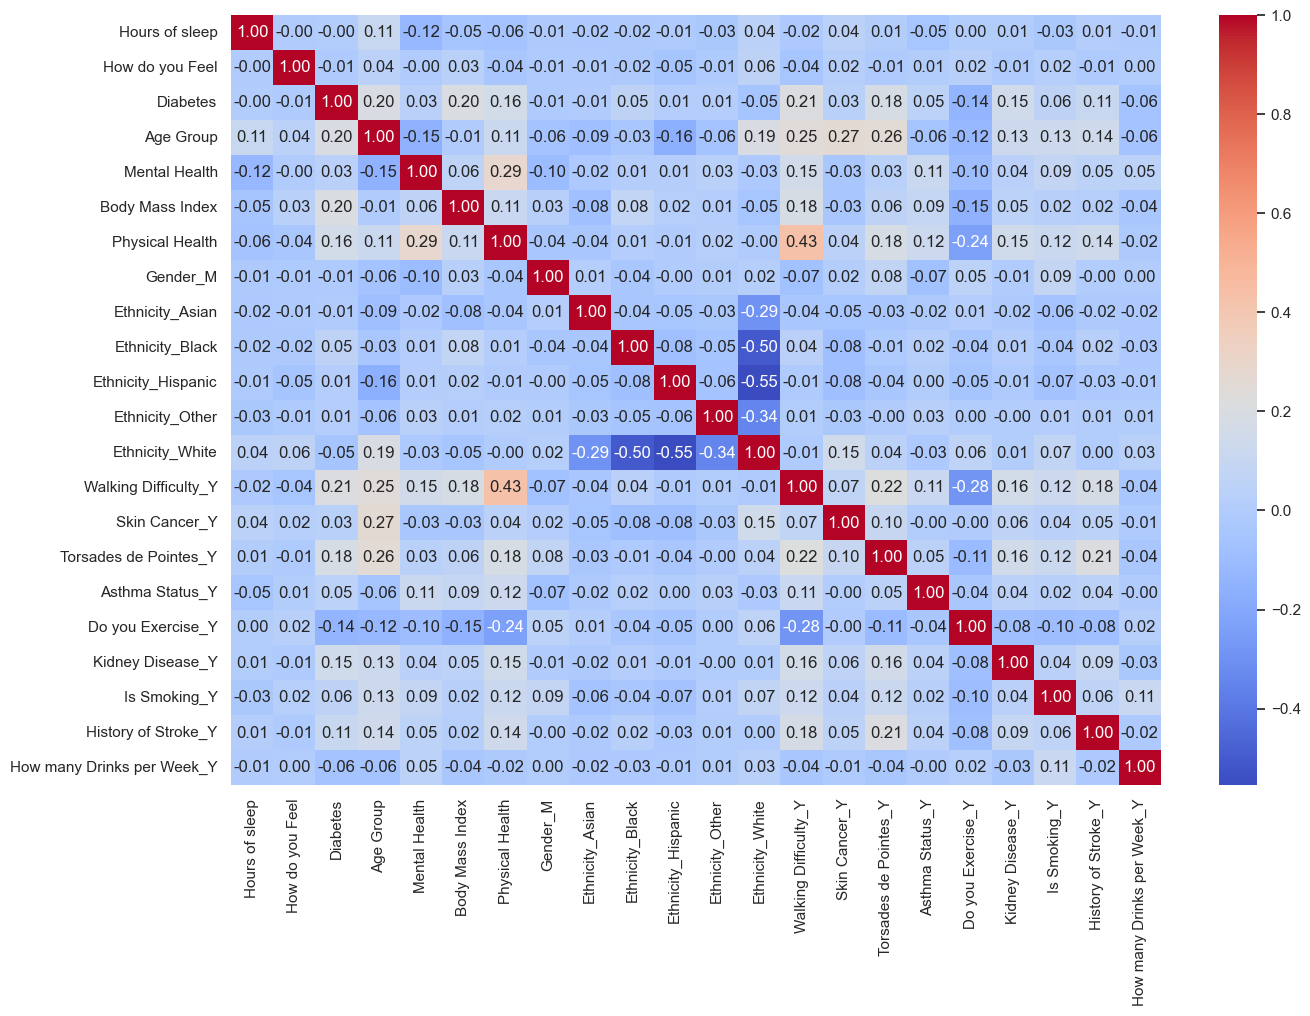

In [21]:
# heatmap complete
plt.figure(figsize=(15, 10))
sns.heatmap(medcenter_df.corr(), annot=True, cmap="coolwarm", fmt='.2f', cbar=True)

### Interpretation of the results 🔍: 
1. `How do you Feel` has little to none correlation with any other feature in the dataset, hence we can consider removing it.

2. `Walking Difficulty` has a positive correlation with `Age Group` at 0.25, indicating that as age increases, walking difficulties tend to be more prevalent.

3. `Diabetes` and `Body Mass Index` have a positive correlation of 0.22, suggesting that higher BMI values may be associated with an increased likelihood of diabetes.

4. `Walking Difficulty` and `Torsades de Pointes` have a positive correlation of 0.22, suggesting that individuals who experience difficulty walking might also have a higher likelihood of encountering Torsades de Pointes, a specific heart arrhythmia. 

5. `How do you Feel` and `Walking Difficulty` show a strong negative correlation of -0.42, suggesting that individuals who have a higher sense of well-being report fewer walking difficulties.

6. `Age Group` has a positive correlation with `Kidney Disease`, `Diabetes`, `Skin Cancer`, and `Torsades de Pointes`, suggesting that the prevalence of these health conditions tends to increase as the population gets older. 

7.  `How do you Feel` and  `Mental Health` have a negative correlation of -0.24, suggesting that individuals that feels better have a higher level of mental well-being.

8. `Torsades de Pointes` and `History of Stroke` have a positive correlation, suggesting that individuals that have encountered Torsades de Pointes may be at an increased risk to encounter the other. 

9. `Do you Exercise` and `Walking Difficulty` have a negative correlation, suggesting that those individuals who exercise report less walking difficulties.

10. Each `Ethnicity` group seem to be uncorrelated to any other meaningful feature that can help us predict our target variable. We can consider removing it.

### Now let's interpret our target variable ! 🔬

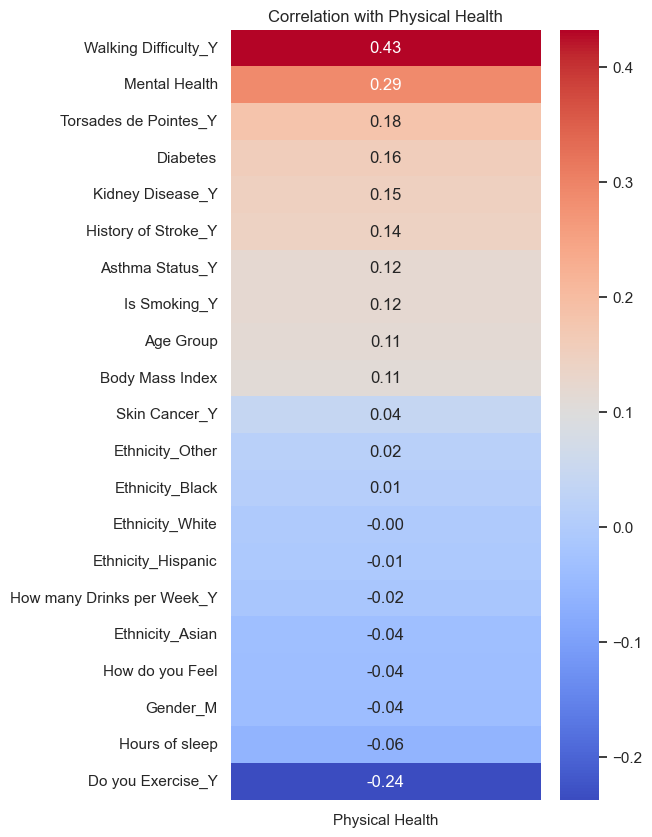

In [22]:
# heatmap with only the target variable
corr_medcenter_df = medcenter_df.corr()

# Define the target variable
target_variable = 'Physical Health'

# Compute the correlation with the target variable
target_corr = corr_medcenter_df[target_variable].drop(target_variable)

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target variable
plt.figure(figsize=(5, 10))
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=True)
plt.title(f'Correlation with {target_variable}')
plt.show()

### Interpretation of the results 🔍: 

This chart represents a correlation matrix, specifically correlating various features with physical health. The color coding indicates the direction and strength of the correlation between each feature and physical health. Features colored in red indicate a positive correlation, meaning that as the value of the feature increases, the physical health metric tends to increase as well. Conversely, features in blue indicate a negative correlation, signifying that as the feature's value increases, the physical health metric tends to decrease. The intensity of the color correlates with the strength of the relationship; darker shades represent stronger correlations. The numeric value beside each feature quantifies this correlation, with values closer to 1 or -1 indicating a stronger positive or negative correlation, respectively.

From the graph:

1. `Walking Difficulty` has a positive correlation of 0.43 with 'Physical Health', which means that as difficulty in walking increases, physical health worsens.
2. `Mental Health` shows a positive correlation of 0.29, indicating that worse mental health is associated with poorer physical health.
4. `Do you Exercise` has a negative correlation of -0.24, suggesting that individuals who exercise tend to have a better (lower) 'Physical Health' score.


Looking at the correlations with our target variable, we can also observe that the columns 'Ethnicity Black', 'Ethnicity Asian', 'Gender M', 'Ethnicity Hispanic', 'Ethnicity Other', and 'Ethnicity White' have a minimal impact on the outcome. Their negligible correlation  indicate that these variables do not hold substantial predictive value. Therefore, to enhance the model's focus and computational efficiency, we have decided to exclude these columns from further analysis.

In [23]:
column_to_drop = ['Ethnicity_Black','Ethnicity_Asian','Gender_M','Ethnicity_Hispanic',  'Ethnicity_Other', 'Ethnicity_White', 'Skin Cancer_Y','How many Drinks per Week_Y']
medcenter_df.drop(column_to_drop, axis = 1, inplace=True)  

#### Pairplot with the feaures having a relevant correlation with our target variable

### Scaling 📚
Scaling numerical variables using a method like StandardScaler is a crucial step in preparing data for many machine learning models. This process adjusts the range of different features to a standard scale, making sure that no single feature dominates the model due to its larger numeric range. In essence, scaling ensures that each feature contributes equally to the model's predictions, preventing bias towards variables simply because they have larger values. This equal footing is vital for models that rely on the relative sizes of features, ensuring a fair comparison across them. 

In [24]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['Hours of sleep', 'Mental Health', 'Body Mass Index', 'Physical Health']
scaler = StandardScaler()
medcenter_df[cols_to_scale] = scaler.fit_transform(medcenter_df[cols_to_scale])
medcenter_df.head()

,Hours of sleep,How do you Feel,Diabetes,Age Group,Mental Health,Body Mass Index,Physical Health,Walking Difficulty_Y,Torsades de Pointes_Y,Asthma Status_Y,Do you Exercise_Y,Kidney Disease_Y,Is Smoking_Y,History of Stroke_Y
0,2.004904,2,0,12,-0.490285,-2.012859,0.436280,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,-0.068710,1,2,9,-0.490285,1.613380,-0.182549,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.068710,2,0,8,-0.490285,-1.058751,-0.058783,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.622495,2,0,9,-0.490285,-0.977015,-0.430080,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.622495,1,2,10,-0.490285,2.309706,-0.430080,1.0,1.0,0.0,1.0,1.0,0.0,0.0


## Partitioning the Dataset into Train and Test Set 🔧

Dividing the dataset into a train and test set is an important step in machine learning. The train set is used to train the model,  while the testing segment is utilized to assess how well the model performs with data it hasn't encountered before.
This division is vital to mitigate the risk of **overfitting**, so to avoid that our model becomes excessively attuned to the training data, impairing its ability to adapt to new, unseen data effectively.
We used the common split ratio 80/20, where 80% of the data is allocated for training purposes and the remaining 20% is set aside for testing.
In this process, it's essential to remove the target variable from the training data. In our case, the column representing `Physical Health` is what we aim to predict. Thus, we exclude it from the training set to ensure our model learns to predict it based solely on the other features. This approach provides a more realistic evaluation of the model's predictive capabilities on new data.


In [25]:
from sklearn.model_selection import train_test_split


X = medcenter_df.drop('Physical Health', axis=1)
y = medcenter_df['Physical Health']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. The dataset is split into features (X) and the target variable (y), with 'X' containing all the predictors after dropping 'Physical Health', and 'y' representing the 'Physical Health' variable which is our continuous outcome of interest.
2. The `train_test_split` function is then used to further divide the dataset into training and test subsets, with `X_train` and `y_train` serving as the training data for the model to learn from, and `X_test` and `y_test` reserved as the test data to evaluate the model's performance.
3. The `test_size=0.2` argument specifies that 20% of the data will be set aside for testing, ensuring that the model is validated on unseen data, while `random_state=42` ensures that the split is reproducible, giving the same division of data if the code is run multiple times.

# Regression 🔢
In our study, we aim to predict the 'Physical Health' status of individuals based on a range of factors such as age, BMI, lifestyle habits, and medical history. The choice of regression analysis as our modeling approach is driven by the continuous nature of our target variable, `Physical Health`, which quantifies the health status of an individual. 
Regression is well-suited for this task as it excels in predicting continuous outcomes and it also allows us to not only predict the physical health score but also to understand the relationship and significance of each factor contributing to health outcomes. For instance, through regression analysis, we can quantify the impact of variables like smoking status or BMI on physical health, offering valuable insights into health determinants. The flexibility and interpretability of regression models make them an ideal choice for our study!


## Decision Tree

We decided to implement decision trees for our regression problem because these models adeptly capture non-linear relationships by partitioning the input feature space into distinct regions, offering considerable flexibility. Nonetheless, hyperparameter tuning is essential to mitigate overfitting and ensure a robust performance.

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred):.3f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred):.3f}")
        print(f"R-squared: {r2_score(y_train, pred):.3f}")
        
    elif not train:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred):.3f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred):.3f}")
        print(f"R-squared: {r2_score(y_test, pred):.3f}")



In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

print_score(tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(tree_reg, X_train, y_train, X_test, y_test, train=False)


Train Result:
Mean Squared Error: 0.018
Mean Absolute Error: 0.019
R-squared: 0.982
Test Result:
Mean Squared Error: 1.204
Mean Absolute Error: 0.514
R-squared: -0.203


The results of this model show us a clear case of overfitting. In the training phase, our decision tree achieved impressively low error rates with an MSE of 0.018 and an MAE of 0.019, along with an R-squared of 0.982, indicating a near-perfect fit to the training data. However, when applied to the test set, the performance dropped drastically, with an MSE jumping to 1.204 and MAE to 0.514, while the R-squared plummeted to -0.203. This negative R-squared value is particularly concerning as it suggests the model is doing worse than a basic model that would simply predict the average of the dependent variable for all observations. Moving forward, it's clear that the model needs to be adjusted to improve its generalization to new data, potentially through hyperparameter tuning.

### Hyperparameter Tuning


Parameter tuning is a crucial step in the process of building a predictive model, as it directly impacts the model's ability to generalize to new data. It involves systematically searching for the optimal set of parameters for a particular predictive model in order to improve its performance. The process works by defining a parameter grid that outlines a range of values to test for each parameter. Techniques like Grid Search exhaustively try out all possible combinations of the parameters specified in the grid. In this case, various values for 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'max_features' are considered.

The Grid Search algorithm runs the model for each combination of parameters, using cross-validation to evaluate the model's performance. Cross-validation involves dividing the dataset into a set number of "folds", training the model on some of these folds, and validating it on the remaining ones. This process is repeated multiple times so that each fold serves as the validation set once. The performance metric is averaged over the folds to get a comprehensive measure of the model's predictive power.

Once all combinations have been evaluated, Grid Search selects the parameter set that yields the best average performance across all the cross-validation folds. By doing this, parameter tuning helps in identifying the configuration that makes the model perform at its best, balancing the trade-off between bias and variance, and ultimately leading to more accurate and robust predictions on unseen data.

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=tree_reg, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=2)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5; total tim

In [29]:
# use the best parameter to train the model and print the performance
best_tree_reg = grid_search.best_estimator_
print_score(best_tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score(best_tree_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 0.559
Mean Absolute Error: 0.411
R-squared: 0.441
Test Result:
Mean Squared Error: 0.602
Mean Absolute Error: 0.424
R-squared: 0.398


The results after the tuning phase suggest that the decision tree model is now more generalized than before. The training results show an MSE of 0.559 and an MAE of 0.411, with an R-squared of 0.441, which indicates a moderate fit to the training data. In the testing phase, the MSE and MAE are relatively close to the training scores, with values of 0.602 and 0.424, respectively, and the R-squared at 0.398 indicates that the model is able to explain nearly 40% of the variance in the test data.

This indicates that the tuning phase has likely reduced overfitting, as evidenced by the consistent performance from training to testing. The R-squared values, while not high, suggest that the model has room for improvement but is capturing some of the underlying patterns in the data. It's a good sign that the test error has not significantly increased compared to the training error, which means our model is generalizing better to unseen data.

Having an MAE of 0.42 in the context of a target variable that ranges continuously from 0 to 30 is quite promising, as it suggests the model's predictions are, on average, less than half a unit away from the true values. This level of precision, particularly for a continuous variable over such a range, indicates that the model is performing with high accuracy, consistently landing very close to the actual results. In practical terms, an error margin of 0.42 on a scale of 30 is relatively minor, implying that for any given prediction, the model's output is likely to be highly reliable, offering predictions that are very close to the actual observed values, which can be especially valuable in fields where even small deviations can be critical.

The R-squared value of 0.398 tells us that the model accounts for nearly 40% of the variation in the target data, which spans from 0 to 30. While this doesn't capture the majority of the variance, it does provide a substantial amount of information, especially considering the potential complexity and noise inherent in real-world data. It's indicative of the model having a moderate level of predictive power, with a significant portion of the target variable's fluctuations being explained by the features in the model.

## Random Forest

Our second model implemented is Random Forest due to its inherent strength in handling complex, non-linear relationships and high-dimensional data. By constructing a multitude of decision trees during the training process and outputting the mean prediction of these trees this method enhances prediction accuracy and robustness, and, unlike individual decision trees, it should reduce the risk of overfitting by averaging the results of many trees, thus generalizing better to new data

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Mean Squared Error: 0.104
Mean Absolute Error: 0.175
R-squared: 0.896
Test Result:
Mean Squared Error: 0.671
Mean Absolute Error: 0.454
R-squared: 0.329


The performance evaluation of our Random Forest model shows a significant disparity between training and test performance, which is indicative of overfitting. During the training phase, the model showed excellent performance with a Mean Squared Error (MSE) of only 0.104 and a Mean Absolute Error (MAE) of 0.175, coupled with a high R-squared value of 0.896. These figures suggest that the model was able to closely match the trends in the training data. However, this success did not translate to the test data set, where the model's predictive accuracy dropped significantly resulting in an increased MSE of 0.671 and a higher MAE of 0.454, while the R-squared value dropped dramatically to 0.329.

Comparing these results with those obtained before hyperparameter tuning in our Decision Tree model, we observe a similar trend of overfitting, but with some differences. If we look at the results of the Decision Tree you can clearly see an lower MSE and MAE, along with an higher R-squared, indicating an even more pronounced overfitting than the Random Forest. Its performance on the test set, with an MSE of 1.204, an MAE of 0.514, and a negative R-squared of -0.203, was significantly worse compared to the test results of the Random Forest. This suggests that while both models experienced overfitting, the Random Forest, with its ensemble approach, was somewhat more resilient to it than the Decision Tree as we expected, although it still requires hyperparameter tuning to improve its predictive accuracy on new data.

In [38]:
import plotly.offline as py
import plotly.graph_objs as go
# Scatter plot 
trace = go.Scatter(
    y = rf_clf.feature_importances_,
    x = medcenter_df.columns.values,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf_clf.feature_importances_,
        colorscale = 'Portland',
        showscale = True
    ),
    text = medcenter_df.columns.values
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter_rfclf_01')

The feature importance graph generated by the Random Forest model helped us to visualize the factors that most significantly influence the 'Physical Health' score of individuals.

From the graph, we can see that 'BMI' (Body Mass Index) stands out as the most influential feature with the highest importance score, suggesting that it is an important predictor of physical health in the population. This is followed by 'How do you Feel', which reflects the self-reported health status of the individual, suggesting that personal perception of health is also a significant predictor.

Other notable characteristics of moderate importance include 'Mental Health' and 'Hours of Sleep', supporting the evidence that mental health and sleep quality are critical components of overall physical health.

At the lower end of the importance scale, we have features such as 'Difficulty Walking', 'Torsades de Pointes', 'Asthma Status', 'Do You Exercise', 'Kidney Disease' and 'Is Smoking'. 


### Random Forest hyperparameter tuning